## Iris dataset neural networks

### Name: Alan Ismael Franquez Conchas

In [2]:
import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets



### Neural Network 

In [3]:
from sklearn.model_selection import train_test_split

# Load iris dataset and create DataFrame
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

y = df['species']
x = df.drop(columns='species')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
NN = MLPClassifier(hidden_layer_sizes=5, max_iter=50,activation='relu', learning_rate='constant', learning_rate_init=0.04)
NN.fit(X_train, y_train)

,hidden_layer_sizes,5
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.04
,power_t,0.5
,max_iter,50
,shuffle,True
,random_state,None


### Evaluate models

In [6]:
Y_pred = NN.predict(X_test)
metrics.accuracy_score(y_test, Y_pred)

1.0

Text(50.722222222222214, 0.5, 'Actual')

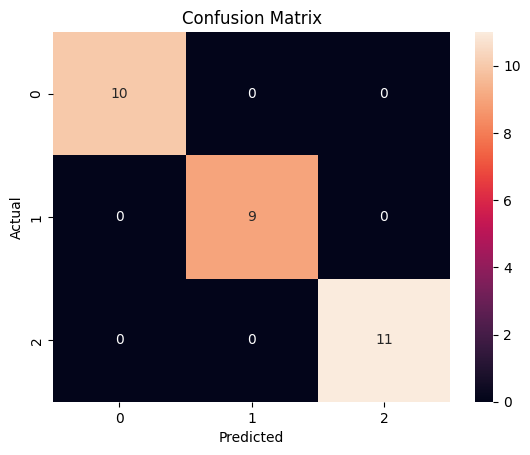

In [7]:
sns.heatmap(metrics.confusion_matrix(y_test, Y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### Hyperparameter tuning

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,), (75,), (100,)],
    'activation': ['relu', 'tanh'],
    'learning_rate': ['constant', 'adaptive'],
    'alpha': [0.0001, 0.001, 0.01]
}

In [9]:
best_model = GridSearchCV(estimator=NN, param_grid=param_grid, n_jobs=-1)
best_model.fit(X_train, y_train)

,estimator,"MLPClassifier..., max_iter=50)"
,param_grid,"{'activation': ['relu', 'tanh'], 'alpha': [0.0001, 0.001, ...], 'hidden_layer_sizes': [(50,), (75,), ...], 'learning_rate': ['constant', 'adaptive']}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,hidden_layer_sizes,"(75,)"


In [13]:
best_model.best_params_

{'activation': 'tanh',
 'alpha': 0.001,
 'hidden_layer_sizes': (75,),
 'learning_rate': 'constant'}

In [12]:
Y_pred =  best_model.predict(X_test)
metrics.accuracy_score(y_test, Y_pred)

1.0